In [1]:
import json
import datetime
from matplotlib import pyplot as plt

In [53]:
dir="2\\rr_inter"

In [54]:
with open(f'{dir}\\dump1.json', 'r') as f:
    data1 = json.load(f)
with open(f'{dir}\\dump2.json', 'r') as f:
    data2 = json.load(f)
# with open(f'{dir}\\dump3_3.json', 'r') as f:
#     data3 = json.load(f)


In [55]:
def getstats(data):
    bytesReceived_in_bits = []
    timestamps=[]
    for j in data['PeerConnections']:
        stats=data['PeerConnections'][j]['stats']
        for i in stats:
            if "statsType" in stats[i]:
                if stats[i]['statsType'] == 'inbound-rtp':
                    if 'bytesReceived_in_bits' in i:
                        bytesReceived_in_bits=stats[i]
                    if 'lastPacketReceivedTimestamp' in i:
                        timestamps=stats[i]
    print(bytesReceived_in_bits)
    try:
        bytesReceived_in_bits['values']=eval(bytesReceived_in_bits['values'])
    except:
        pass
    try:
        timestamps['values']=eval(timestamps['values'])
    except:
        pass
    times=[0]
    for i in range(len(timestamps['values'])):
        date_time_obj = datetime.datetime.strptime(timestamps['values'][i], '%m/%d/%Y, %I:%M:%S %p')
        timestamps['values'][i]=date_time_obj
        if i>0:
            times.append((timestamps['values'][i]-timestamps['values'][0]).seconds)
    return bytesReceived_in_bits,times

def draw_latency_graph(dir):
    snd_data= open(f"{dir}\\send_stats.txt","r").read()
    recv_data = open(f"{dir}\\incoming_stats.txt","r").read()     
    snd_data = snd_data.split("\n")
    recv_data = recv_data.split("\n")   
    # print(snd_data)
    # print(recv_data)
    snd_data = snd_data[:-1]
    recv_data = recv_data[:-1]  
    # offset=abs(float(recv_data[0])-float(snd_data[0]))-0.25
    latencies=[]
    for i in range(min(len(recv_data),len(snd_data))):
        snd_data[i] = float(snd_data[i])
        recv_data[i] = float(recv_data[i])
        latency = recv_data[i] - snd_data[i]    
        latencies.append(abs(latency)) 
    print(latencies)
    plt.plot(latencies)
    plt.ylim(0,1)
    plt.xlabel('Time')
    plt.ylabel('Latency')
    plt.show()



[0.5093400478363037, 0.5102331638336182, 0.48250389099121094, 0.49318552017211914, 0.4837462902069092, 0.5016293525695801, 0.499190092086792, 0.48602747917175293, 0.48691797256469727, 0.48563599586486816, 0.4956240653991699, 0.49683427810668945, 0.5021638870239258, 0.5000195503234863, 0.5106868743896484, 0.5005283355712891, 0.4928135871887207, 0.48575925827026367, 0.4844193458557129, 0.47891831398010254, 0.48349761962890625, 0.48596692085266113, 0.4810962677001953, 0.4797368049621582, 0.48273777961730957, 0.4873387813568115, 0.4934377670288086, 0.4952869415283203, 0.49124813079833984, 0.49516868591308594, 1.0312268733978271, 0.9059937000274658, 0.8513360023498535, 0.8510410785675049, 0.8471865653991699, 0.853161096572876, 0.8396103382110596, 0.8443031311035156, 0.9541237354278564, 0.8733797073364258, 0.8660528659820557, 0.9028749465942383, 0.8915092945098877, 0.882502555847168, 0.8992595672607422, 0.9019196033477783, 0.9148499965667725, 0.9315130710601807, 0.8998019695281982, 0.8693172

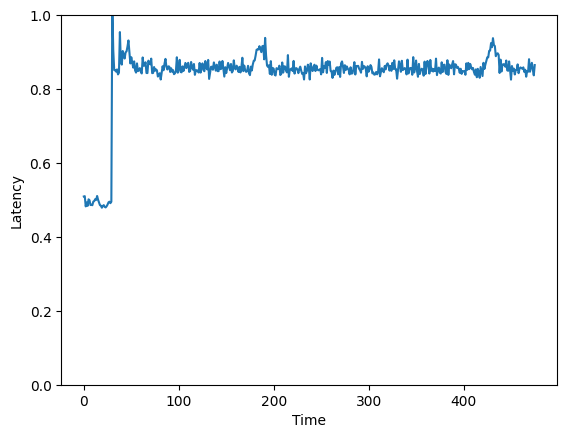

In [56]:
draw_latency_graph(dir)

In [57]:
bytesReceived_in_bits1,timestamps1=getstats(data1)
bytesReceived_in_bits2,timestamps2=getstats(data2)
# bytesReceived_in_bits3,timestamps3=getstats(data3)
print(bytesReceived_in_bits2['values'])

{'startTime': '1970-01-03T15:23:09.002Z', 'endTime': '1970-01-03T15:24:18.116Z', 'statsType': 'inbound-rtp', 'values': '[0,11720.227963759666,55655.184712563554,187533.2637035127,429799.01853332383,622444.3991444685,490024.5039986198,561926.8213050716,378373.72493096313,565099.7891858906,517996.00790132064,464176.3806990257,629996.5465930314,671059.1398869704,629872.598344691,639054.4142401447,459341.21427810553,644381.457981829,673872.8482610702,656743.6044076289]'}
{'startTime': '1970-01-03T15:23:09.002Z', 'endTime': '1970-01-03T15:24:21.117Z', 'statsType': 'inbound-rtp', 'values': '[0,11720.227963759666,55655.184712563554,187533.2637035127,429799.01853332383,622444.3991444685,490024.5039986198,561926.8213050716,378373.72493096313,565099.7891858906,517996.00790132064,464176.3806990257,629996.5465930314,671059.1398869704,629872.598344691,639054.4142401447,459341.21427810553,644381.457981829,673872.8482610702,656743.6044076289,593419.2381285267,679839.725892957,736482.9653515045]'}
[0,

In [58]:
minlength=min(timestamps1[-1],timestamps2[-1])
timestamps1=[i for i in timestamps1 if i<=minlength]
timestamps2=[i for i in timestamps2 if i<=minlength]
# timestamps3=[i for i in timestamps3 if i<=minlength]
bytesReceived_in_bits1['values']=bytesReceived_in_bits1['values'][:len(timestamps1)]
bytesReceived_in_bits2['values']=bytesReceived_in_bits2['values'][:len(timestamps2)]
# bytesReceived_in_bits3['values']=bytesReceived_in_bits3['values'][:len(timestamps3)]

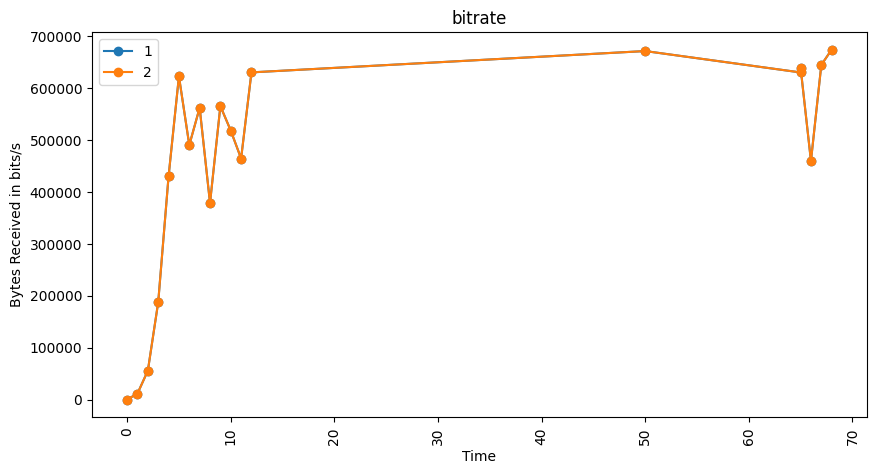

In [59]:



plt.figure(figsize=(10, 5))
plt.plot(timestamps1, bytesReceived_in_bits1['values'],marker='o')  
plt.plot(timestamps2, bytesReceived_in_bits2['values'],marker='o')
# plt.plot(timestamps3, bytesReceived_in_bits3['values'],marker='o')
plt.xticks(rotation=90)
plt.xlabel('Time')
plt.ylabel('Bytes Received in bits/s')
plt.legend(['1','2','3'])
plt.title("bitrate")
plt.show()